# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 7 with the *SuperStore Retail Orders* dataset

In this lab, your assignment is to do a regression model to predict sales revenue.  You can focus your efforts on predicting sales by month and product line.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [52]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [53]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders (3).csv')

!cp "/content/drive/MyDrive/Colab Notebooks/lab12_retailer_tune_model.ipynb" ./
!jupyter nbconvert --to html "lab12_retailer_tune_model.ipynb"

Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/lab12_retailer_tune_model.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern 'lab12_retailer_tune_model.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: 

## Prepare Data

➡️ Assignment Tasks
- Create any needed variables, such as month of year and total_amount.  
- Filter out any incomplete orders

In [54]:
#number conversion
#number conversion
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df_cleaned = df.dropna()


def month_num_to_abbr_only(month_year_str):
    _, month_num = month_year_str.split('-')
    month_abbr = pd.to_datetime(month_num, format='%m').strftime('%b')
    return month_abbr

df_cleaned['order_month_abbr_only'] = df_cleaned['order_year_month'].apply(month_num_to_abbr_only)

df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']

#seasonality
seasons = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall',   'Oct': 'Fall',   'Nov': 'Fall'
}


df_cleaned['season'] = df_cleaned['order_month_abbr_only'].map(seasons)


seasonal_revenue = df_cleaned.groupby('season')['total_sales'].sum()

#revenue over time
df_cleaned['order_year'] = df_cleaned['order_year_month'].apply(lambda x: x.split('-')[0])


yearly_revenue = df_cleaned.groupby('order_year')['total_sales'].sum()

#indoor/outdoor variable
def categorize_product_line(product_line):
    indoor_lines = ['cameras', 'clothing', 'officeproducts', 'laptop', 'projector', 'electronics']
    outdoor_lines = ['accessories', 'bikes', 'mobile']

    product_line_lower = product_line.lower()

    if product_line_lower in indoor_lines:
        return 'indoor'
    elif product_line_lower in outdoor_lines:
        return 'outdoor'
    else:
        return 'unknown'


df_cleaned['type_of_product'] = df_cleaned['product_line'].apply(categorize_product_line)


quantity_by_type = df_cleaned.groupby('type_of_product')['quantity'].sum()



<ipython-input-54-56d1f0e1f73f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_month_abbr_only'] = df_cleaned['order_year_month'].apply(month_num_to_abbr_only)
<ipython-input-54-56d1f0e1f73f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']
<ipython-input-54-56d1f0e1f73f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [55]:
df_filtered.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price', 'order_month_abbr_only', 'total_sales', 'season',
       'order_year', 'type_of_product', 'complete_customer_info'],
      dtype='object')

In [56]:
complete_info_count_final_filtered = df_filtered.isna().sum(axis=1).value_counts().sort_index(ascending=False)

In [57]:
# Check if the 'complete_customer_info' column exists in the DataFrame
print(df_filtered.columns)

# Check the number of columns in the DataFrame
print(len(df_filtered.columns))

# Print the last few rows of the DataFrame
print(df_filtered.tail())

# Check if the DataFrame is the correct one
print(df_filtered.shape)

# If the column does not exist or the DataFrame is incorrect, fix the code accordingly

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price', 'order_month_abbr_only', 'total_sales', 'season',
       'order_year', 'type_of_product', 'complete_customer_info'],
      dtype='object')
16
       order_id  order_date order_year_month     customer_name  \
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                  city             state_province  quantity  \
56040        Port Mark  ALABAMA                         1.0   
56041   West Aprilfurt  NEBRASKA                        1.0   
56042    New Lindaview  ILLINOIS                        1.0   
56043  West Frankhaven  ARKANSAS      

In [58]:
#filter records
df_filtered = df_cleaned.copy()  # Making a copy to avoid SettingWithCopyWarning

df_filtered = df_filtered[df_filtered['quantity'] <= 10]
df_filtered = df_filtered[df_filtered['product_price'] != 235481]
df_filtered['order_year'] = df_filtered['order_year_month'].apply(lambda x: int(x.split('-')[0]))
df_filtered = df_filtered[(df_filtered['order_year'] >= 2018) & (df_filtered['order_year'] <= 2024)]

# Recalculate metrics with the filtered data
# Seasonal revenue
seasonal_revenue_filtered = df_filtered.groupby('season')['total_sales'].sum()
# Yearly revenue
yearly_revenue_filtered = df_filtered.groupby('order_year')['total_sales'].sum()
# Quantity by product type
quantity_by_type_filtered = df_filtered.groupby('type_of_product')['quantity'].sum()
# Complete customer information count
complete_info_count_final_filtered = df_filtered['complete_customer_info'].value_counts()


customer_fields = ['order_id','order_date','order_year_month','customer_name', 'city', 'state_province', 'quantity', 'product_name', 'product_line', 'product_price','order_month_abbr_only','total_sales']
df_filtered['complete_customer_info'] = df_filtered[customer_fields].apply(lambda row: 1 if row.notnull().all() else 2, axis=1)

complete_info_count_final = df_filtered['complete_customer_info'].value_counts()


# Filtering out incomplete orders based on 'complete_customer_info' column
df_complete_orders = df_filtered[df_filtered['complete_customer_info'] == 1]

# Let's quickly check the basic info to ensure we only have complete orders now
df_complete_orders.info(), df_complete_orders['complete_customer_info'].value_counts()


KeyError: 'complete_customer_info'

## Visualize Data

➡️ Assignment Tasks
- Create at least 2 plots showing total revenue (quantity * price) by other variables (see Lab 7).

<ipython-input-59-1bc33b7ec007>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_year'] = df_cleaned['order_year_month'].apply(lambda x: x.split('-')[0])


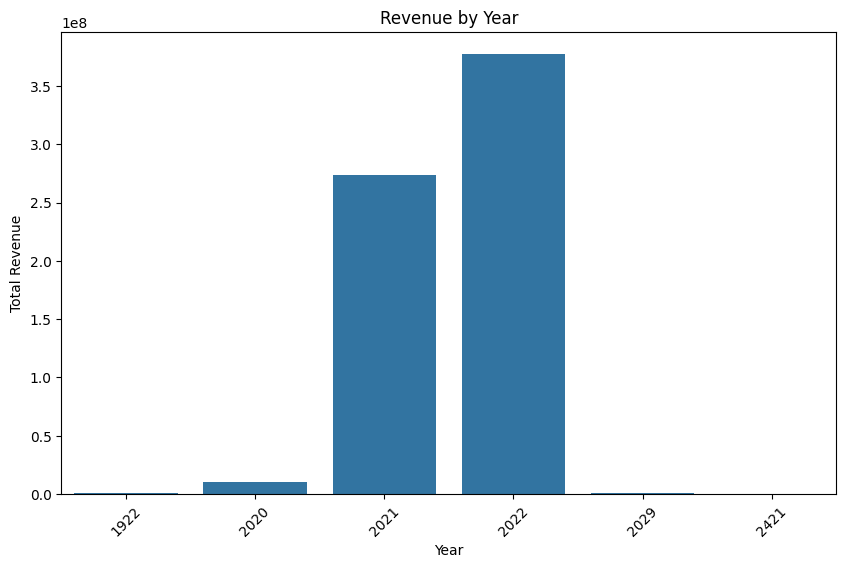

In [59]:
#plots
#revenue over time
df_cleaned['order_year'] = df_cleaned['order_year_month'].apply(lambda x: x.split('-')[0])


yearly_revenue = df_cleaned.groupby('order_year')['total_sales'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values)
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability


plt.show()


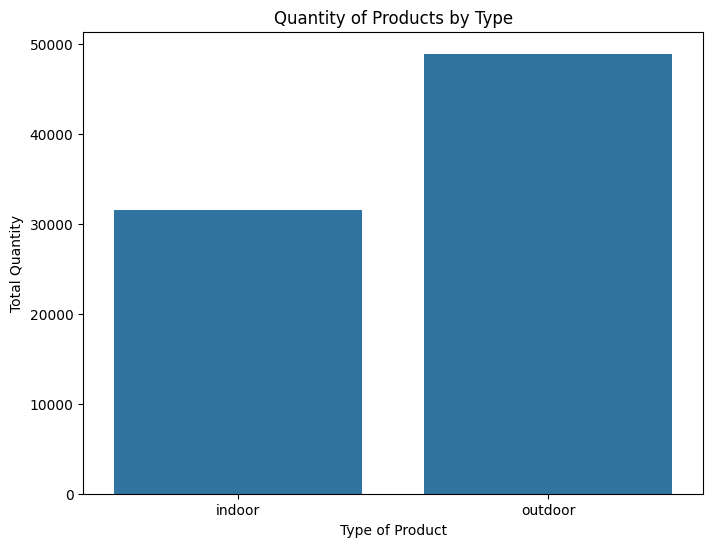

In [60]:
#plots

plt.figure(figsize=(8, 6))
sns.barplot(x=quantity_by_type_filtered.index, y=quantity_by_type_filtered.values)
plt.title('Quantity of Products by Type')
plt.xlabel('Type of Product')
plt.ylabel('Total Quantity')
plt.show()


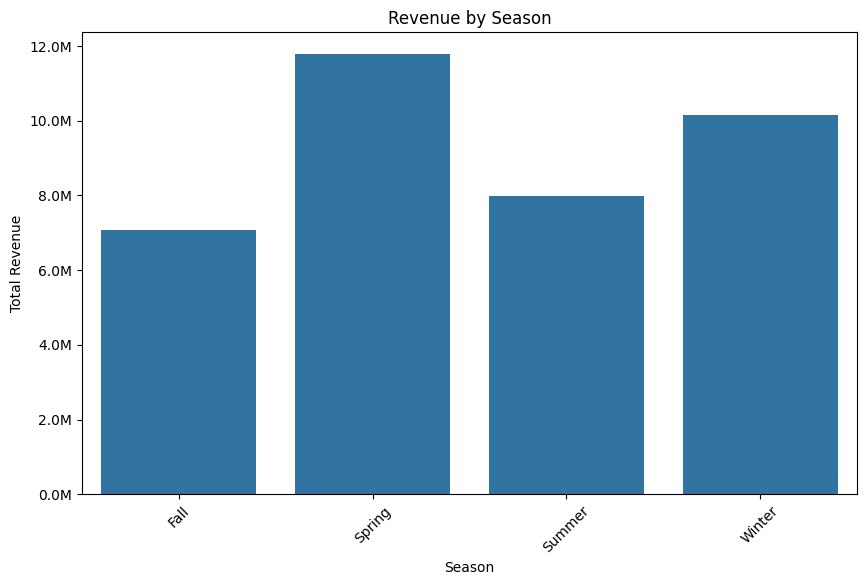

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_revenue_filtered.index, y=seasonal_revenue_filtered.values)
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Format the y-axis to display numbers in a more readable format (e.g., '10M' for 10000000)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{x/1e6}M'))

plt.show()

## Regression

For more info on regression models, see: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use ONLY ONE of the independent variables, such as month of the year
- Output your coefficients

In [62]:
#create model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Since the model should predict total revenue based on the month, we'll create a numeric representation of the month.
# First, we need to extract the month as a numeric value.
df_complete_orders['order_month_num'] = df_complete_orders['order_month_abbr_only'].apply(lambda x: pd.to_datetime(x, format='%b').month)

# Grouping data by month to calculate total revenue per month
monthly_revenue = df_complete_orders.groupby('order_month_num')['total_sales'].sum().reset_index()

# Preparing data for the model
X = monthly_revenue[['order_month_num']]  # Feature
y = monthly_revenue['total_sales']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
linear_model = LinearRegression()

# Fitting the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

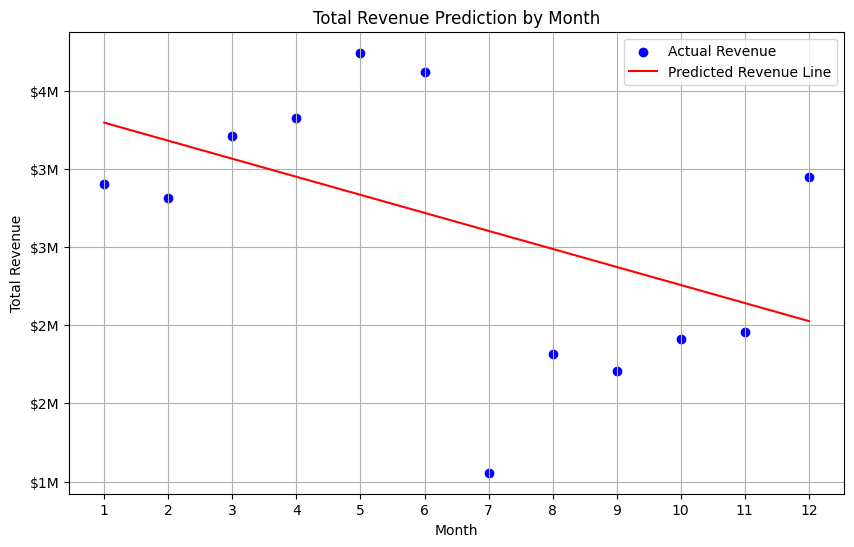

(3910222.003184357, -115342.51354748597)

In [63]:
#display coefficients


# To make the revenue on the y-axis easier to understand, we'll format it in millions of dollars.

# Function to format the y-axis ticks
def millions_formatter(x, pos):
    return f'${int(x/1e6)}M'

from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Revenue')
plt.plot(X, y_pred, color='red', label='Predicted Revenue Line')
plt.title('Total Revenue Prediction by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(np.arange(min(X['order_month_num']), max(X['order_month_num'])+1, 1.0))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.grid(True)
plt.show()

#display coefficients
intercept = linear_model.intercept_
slope = linear_model.coef_[0]

(intercept, slope)

## Regression - Improved

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use at least two more independent variables (see varabiables from Lab 7)
- Output your coefficients
- Did your R2 value improve (better fit)?

In [65]:
#create model
# Preparing data for the model with both month and year as independent variables
X_multi = df_complete_orders[['order_month_num', 'order_year']]  # Features
y_multi = df_complete_orders['total_sales']  # Target variable

# Since we're using all data for training to demonstrate the model, we won't split it here
linear_model_multi = LinearRegression()

# Fitting the model to the data
linear_model_multi.fit(X_multi, y_multi)



LinearRegression()

In [66]:
#display coefficients
intercept_multi = linear_model_multi.intercept_
coefficients_multi = linear_model_multi.coef_

(intercept_multi, coefficients_multi)

(1825922.3665008766, array([-116.13946909, -902.56113837]))

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
#compare models
# Calculating R^2 values for both models
from sklearn.metrics import r2_score

# Recalculating R^2 values for both models with print statements to indicate the better model

# First model (single variable - month)
r2_single = r2_score(y, y_pred_single)

# Multi-variable model (month and year)
r2_multi = r2_score(y_multi, y_pred_multi)

# Determining which model is better
if r2_single > r2_multi:
    better_model = "The single-variable model is better."
else:
    better_model = "The multi-variable model is better."

print(f"R^2 for single-variable model: {r2_single}")
print(f"R^2 for multi-variable model: {r2_multi}")
print(better_model)

NameError: name 'y_pred_single' is not defined

## One-Hot Product

➡️ Assignment Tasks
- Create one-hot/dummy encoding for the product line variable.  Use those new encoded variables for the regression

In [69]:
#create variable
# Creating one-hot encoding for the 'product_line' variable
df_one_hot = pd.get_dummies(df_complete_orders, columns=['product_line'])

# Previewing the new dataframe to confirm one-hot encoding
df_one_hot.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_price,order_month_abbr_only,...,order_month_num,product_line_Accessories,product_line_Bikes,product_line_Cameras,product_line_Clothing,product_line_Electronics,product_line_Laptop,product_line_Mobile,product_line_OfficeProducts,product_line_Projector
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",649.99,Jul,...,7,False,False,False,False,False,False,True,False,False
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",649.99,Jul,...,7,False,False,False,False,False,False,True,False,False
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",649.99,Jul,...,7,False,False,False,False,False,False,True,False,False
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",649.99,Jul,...,7,False,False,False,False,False,False,True,False,False
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",649.99,Jul,...,7,False,False,False,False,False,False,True,False,False


In [70]:
#create model
# Selecting the one-hot encoded columns as features and 'total_sales' as the target variable
X_one_hot = df_one_hot.drop(columns=['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
                                     'state_province', 'quantity', 'product_name', 'product_price',
                                     'order_month_abbr_only', 'total_sales', 'season', 'order_year',
                                     'type_of_product', 'complete_customer_info', 'order_month_num'])
y_one_hot = df_one_hot['total_sales']

# Creating and fitting the Linear Regression model
linear_model_one_hot = LinearRegression()
linear_model_one_hot.fit(X_one_hot, y_one_hot)

# Displaying the coefficients of the one-hot encoded model
intercept_one_hot = linear_model_one_hot.intercept_
coefficients_one_hot = linear_model_one_hot.coef_

(intercept_one_hot, dict(zip(X_one_hot.columns, coefficients_one_hot)))


(60189179260786.4,
 {'product_line_Accessories': -60189179260768.94,
  'product_line_Bikes': -60189179258964.83,
  'product_line_Cameras': -60189179260084.39,
  'product_line_Clothing': -60189179260734.164,
  'product_line_Electronics': -60189179259818.414,
  'product_line_Laptop': -60189179257207.64,
  'product_line_Mobile': -60189179259769.3,
  'product_line_OfficeProducts': -60189179260769.67,
  'product_line_Projector': -60189179257400.45})

In [71]:
#display coefficients
# Calculating R^2 value for the one-hot encoded model
y_pred_one_hot = linear_model_one_hot.predict(X_one_hot)
r2_one_hot = r2_score(y_one_hot, y_pred_one_hot)

# Print statements for R^2 values and which model is better
print(f"R^2 for single-variable model (Month): {r2_single}")
print(f"R^2 for multi-variable model (Month and Year): {r2_multi}")
print(f"R^2 for one-hot encoded model (Product Line): {r2_one_hot}")

# Determining the best model based on R^2 values
best_model_r2 = max(r2_single, r2_multi, r2_one_hot)
if best_model_r2 == r2_single:
    print("The best model is the single-variable model (Month).")
elif best_model_r2 == r2_multi:
    print("The best model is the multi-variable model (Month and Year).")
else:
    print("The best model is the one-hot encoded model (Product Line).")



NameError: name 'r2_single' is not defined